# SOURCE MODEL (SM) RAW TRAINING DATA : HANDLING CLASS IMBALANCE AND PRE-PROCESSING FOR SOURCE MODEL (SM) TRAINING

## SOURCE MODEL (SM) - RAW TRAINING DATA WITH PRE-PROCESSED TARGET

## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print("Import Completed")

Import Completed


## Importing the Source Model (SM) Raw Training Data csv File

In [2]:
source_model_raw_train = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhyauk6/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_raw_data/source_model_raw_train.csv")

print("Data Export Completed")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data Export Completed


In [3]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [4]:
# Checking the size of the dataset

source_model_raw_train.shape

(419426, 155)

In [5]:
# Checking the first 3 column names of the dataset

source_model_raw_train.columns[[0, 1, 2]]

Index(['Unnamed: 0', 'id', 'member_id'], dtype='object')

In [6]:
# Removing the first index column from the dataset

source_model_raw_train.drop(source_model_raw_train.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [7]:
# Re-checking the size of the dataset

source_model_raw_train.shape

(419426, 154)

In [8]:
# Displying the first 5 data instances

source_model_raw_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,fico_average_latest,fico_score_status_good-_good+,fico_score_status
0,74565928,NaN,30000.0,30000.0,30000.0,36 months,19.53,1107.74,D,D5,Manager,2 years,RENT,60000.0,Verified,Mar-16,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,907xx,CA,9.54,0.0,Apr-05,1.0,29.0,NaN,18.0,0.0,15694.0,20.8,22.0,w,0.00,0.00,39845.904740,39845.90,30000.00,9845.90,0.0,0.00,0.0000,Mar-19,1107.55,NaN,Mar-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1459.0,166376.0,3.0,0.0,0.0,0.0,39.0,0.0,NaN,4.0,10.0,5692.0,21.0,75300.0,0.0,0.0,6.0,10.0,9787.0,52771.0,22.7,0.0,0.0,131.0,120.0,3.0,3.0,1.0,3.0,NaN,1.0,NaN,0.0,8.0,9.0,14.0,14.0,4.0,17.0,17.0,9.0,18.0,0.0,0.0,0.0,4.0,94.7,0.0,0.0,0.0,241729.0,15694.0,68300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,690.0,694.0,714.0,710.0,712,Good+,1
1,137865468,NaN,16000.0,16000.0,16000.0,36 months,6.67,491.63,A,A2,Cash Management Specialist 2,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-18,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,750xx,TX,11.38,0.0,May-05,0.0,NaN,NaN,6.0,0.0,27068.0,62.5,12.0,w,13133.68,13133.68,3429.550000,3429.55,2866.32,563.23,0.0,0.00,0.0000,Mar-19,491.63,Apr-19,Mar-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,183276.0,0.0,0.0,0.0,0.0,38.0,0.0,NaN,0.0,0.0,19190.0,63.0,43300.0,0.0,0.0,0.0,1.0,30546.0,8123.0,76.6,0.0,0.0,138.0,158.0,59.0,12.0,2.0,59.0,NaN,14.0,NaN,0.0,3.0,4.0,3.0,4.0,2.0,5.0,8.0,4.0,6.0,0.0,0.0

## SOURCE MODEL (SM) TRAINING DATA : FINALISED FEATURES

### Based on the above results from "Recursive Feature Elimination" Wrapper Method for Feature Selection; we will be selecting the top ranked features for each of the 5 FICO factors and Non-FICO factor with below listed percentages.

### The percentages of top ranked features from each factor are selected by considering the effect of feature importance/weightage given by the official FICO website for the 5 FICO factors and custom feature importance/weightage that can potentially be considered by the lenders for the non-FICO factor

> #### 1. FICO Factor 1      - Payment History            - (35%)      <b><font color='blue'>- 50% of Top-Ranked Features</b></font>      <b><font color='green'>- 9 out of 17</b></font>
> #### 2. FICO Factor 2      - Amount Owed                - (30%)      <b><font color='blue'>- 50% of Top-Ranked Features</b></font>      <b><font color='green'>- 5 out of 10</b></font>
> #### 3. FICO Factor 3      - Length of Credit History   - (15%)      <b><font color='blue'>- 50% of Top-Ranked Features</b></font>      <b><font color='green'>- 2 out of 3</b></font>
> #### 4. FICO Factor 4      - Credit Mix                 - (10%)      <b><font color='blue'>- 25% of Top-Ranked Features</b></font>      <b><font color='green'>- 3 out of 13</b></font>
> #### 5. FICO Factor 5      - New Credit                 - (10%)      <b><font color='blue'>- 25% of Top-Ranked Features</b></font>      <b><font color='green'>- 3 out of 10</b></font>
> #### 6. Non-FICO Factor 6  - Lender's Internal          - (Custom)   <b><font color='blue'>- 75% of Top-Ranked Features</b></font>      <b><font color='green'>- 3 out of 4</b></font>

### This results in a total of about <b><font color='yellow'>25 Input Features and 1 Target/Output</b></font>

## Finalised List of 25 Features Based on Each of the 5 FICO Factor and Non-FICO Lenders Internal Factor; along with 1 Target

In [9]:
# Finalised Features List (25) related to FICO Scores and Lender's Internal for the Source Model (SM) with 1 Output (Target)
# Listed in the order of the 5 FICO Factor and 1 Non-FICO Factor
# Listed in the increasing order of the ranking starting from 1 for each of the 5 FICO Factor and 1 Non-FICO Factor

sm_finalised_features_list = ['pub_rec', 'delinq_2yrs', 'num_tl_120dpd_2m', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m',
                             'num_accts_ever_120_pd', 'acc_now_delinq', 'num_tl_30dpd', 'total_rec_late_fee',
                             'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_util', 'il_util', 'max_bal_bc',
                             'mo_sin_old_rev_tl_op', 'earliest_cr_line',
                             'open_acc', 'num_sats', 'mort_acc',
                             'inq_last_6mths', 'open_il_12m', 'num_tl_op_past_12m',
                             'annual_inc', 'dti', 'emp_length',
                             'fico_score_status']

sm_finalised_features_list_inputs = ['pub_rec', 'delinq_2yrs', 'num_tl_120dpd_2m', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m',
                                   'num_accts_ever_120_pd', 'acc_now_delinq', 'num_tl_30dpd', 'total_rec_late_fee',
                                   'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_util', 'il_util', 'max_bal_bc',
                                   'mo_sin_old_rev_tl_op', 'earliest_cr_line',
                                   'open_acc', 'num_sats', 'mort_acc',
                                   'inq_last_6mths', 'open_il_12m', 'num_tl_op_past_12m',
                                   'annual_inc', 'dti', 'emp_length']
                                 
# Total Number of Finalised Features
print("Total Number of Finalised Features including 1 Target: ", len(sm_finalised_features_list))
print("Total Number of Finalised Input Features: ", len(sm_finalised_features_list_inputs))

print("Execution Completed")

Total Number of Finalised Features including 1 Target:  26
Total Number of Finalised Input Features:  25
Execution Completed


In [10]:
# Finalised Features List (9) that are relevant to FICO Scores : "Payment History" Factor-1
# Listed in the increasing order of the ranking starting from 1 to 9

sm_fico_payment_history_finalised_features = ['pub_rec', 'delinq_2yrs', 'num_tl_120dpd_2m', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m',
                                             'num_accts_ever_120_pd', 'acc_now_delinq', 'num_tl_30dpd', 'total_rec_late_fee']
                                             

print("Total Number of Finalised Features related to FICO Score Factor 1 'Payment History': ", len(sm_fico_payment_history_finalised_features))

print("Execution Completed")

Total Number of Finalised Features related to FICO Score Factor 1 'Payment History':  9
Execution Completed


In [11]:
# Finalised Features List (5) that are relevant to FICO Scores : "Amount Owed" Factor-2
# Listed in the increasing order of the ranking starting from 1 to 5

sm_fico_amount_owed_finalised_features = ['num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_util', 'il_util', 'max_bal_bc']
                                        

print("Total Number of Finalised Features related to FICO Score Factor 2 'Amount Owed': ", len(sm_fico_amount_owed_finalised_features))

print("Execution Completed")

Total Number of Finalised Features related to FICO Score Factor 2 'Amount Owed':  5
Execution Completed


In [12]:
# Finalised Features List (2) that are relevant to FICO Scores : "Length of Credit History"
# Listed in the increasing order of the ranking starting from 1 to 2


sm_fico_length_of_credit_history_finalised_features = ['mo_sin_old_rev_tl_op', 'earliest_cr_line']
                                                      
                             
print("Total Number of Finalised Features related to FICO Score Factor 3 'Length of Credit History': ", len(sm_fico_length_of_credit_history_finalised_features))

print("Execution Completed")                             

Total Number of Finalised Features related to FICO Score Factor 3 'Length of Credit History':  2
Execution Completed


In [13]:
# Finalised Features List (3) that are relevant to FICO Scores : "Credit Mix" Factor-4
# Listed in the increasing order of the ranking starting from 1 to 3


sm_fico_credit_mix_finalised_features = ['open_acc', 'num_sats', 'mort_acc']
                                        

print("Total Number of Finalised Features related to FICO Score Factor 4 'Credit Mix': ", len(sm_fico_credit_mix_finalised_features))

print("Execution Completed")

Total Number of Finalised Features related to FICO Score Factor 4 'Credit Mix':  3
Execution Completed


In [14]:
# Finalised Features List (3) that are relevant to FICO Scores : "New Credit" Factor-5
# Listed in the increasing order of the ranking starting from 1 to 3

sm_fico_new_credit_finalised_features = ['inq_last_6mths', 'open_il_12m', 'num_tl_op_past_12m']                                        
                           
print("Total Number of Finalised Features related to FICO Score Factor 5 'New Credit': ", len(sm_fico_new_credit_finalised_features))

print("Execution Completed")

Total Number of Finalised Features related to FICO Score Factor 5 'New Credit':  3
Execution Completed


In [15]:
# Finalised Features List (3) that are relevant to Non-FICO : "Lenders Internal" Factor 6
# Listed in the increasing order of the ranking starting from 1 to 3

sm_non_fico_lenders_internal_finalised_features = ['annual_inc', 'dti', 'emp_length']
                                                                               
print("Total Number of Finalised Features related to Non-FICO Score Factor 6 'Lenders Internal': ", len(sm_non_fico_lenders_internal_finalised_features))

print("Execution Completed")

Total Number of Finalised Features related to Non-FICO Score Factor 6 'Lenders Internal':  3
Execution Completed


## Creating a new Dataframe which includes only the finalised input features and the target variable

In [16]:
source_model_raw_train_finalised_features = source_model_raw_train[sm_finalised_features_list].copy()

print("Execution Completed")

Execution Completed


In [17]:
# Sets the pandas dataframe options to display all columns/rows

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [18]:
# Checking the size of the dataset

source_model_raw_train_finalised_features.shape

(419426, 26)

In [19]:
# Displying a random sample of 10 data instances from the dataframe

source_model_raw_train_finalised_features.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length,fico_score_status
284070,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,50.0,46.1,36.0,6174.0,259.0,Oct-95,13.0,13.0,7.0,1.0,0.0,0.0,90000.0,12.84,10+ years,1
59377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,21.5,100.0,4764.0,56.0,Dec-03,8.0,8.0,0.0,0.0,0.0,1.0,50000.0,10.44,10+ years,1
103435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,71.4,50.5,NaN,NaN,233.0,Nov-95,19.0,19.0,2.0,0.0,NaN,4.0,48000.0,33.90,NaN,1
62730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,42.7,36.0,5642.0,160.0,Apr-04,9.0,9.0,1.0,1.0,0.0,3.0,78000.0,18.45,< 1 year,0
293753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100.0,67.9,84.0,5498.0,187.0,Jun-02,6.0,6.0,4.0,2.0,1.0,1.0,50000.0,23.43,7 years,1
177184,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,45.5,34.0,2068.0,179.0,Jun-00,20.0,20.0,4.0,0.0,0.0,5.0,90000.0,12.21,10+ years,1
336444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,69.7,NaN,NaN,323.0,May-88,7.0,7.0,5.0,0.0,NaN,0.0,44000.0,17.86,2 years,1
384069,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,43.4,71.0,1571.0,131.0,Jun-05,11.0,11.0,1.0,0.0,1.0,1.0,83000.0,24.71,10+ years,1
325442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,33.3,25.2,76.0,1912.0,399.0,Mar-83,10.0,10.0,3.0,0.0,2.0,2.0,152800.0,11.97,6 years,1
116796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.3,21.5,47.0,6575.0,75.0,Apr-11,11.0,11.0,1.0,2.0,0.0,3.0,150000.0,12.59,5 years,1


In [20]:
# Checking the datatypes of the dataframe

for feat in source_model_raw_train_finalised_features.columns:
    print(feat, ".....", source_model_raw_train_finalised_features.dtypes[feat])

pub_rec ..... float64
delinq_2yrs ..... float64
num_tl_120dpd_2m ..... float64
pub_rec_bankruptcies ..... float64
num_tl_90g_dpd_24m ..... float64
num_accts_ever_120_pd ..... float64
acc_now_delinq ..... float64
num_tl_30dpd ..... float64
total_rec_late_fee ..... float64
num_rev_tl_bal_gt_0 ..... float64
percent_bc_gt_75 ..... float64
revol_util ..... float64
il_util ..... float64
max_bal_bc ..... float64
mo_sin_old_rev_tl_op ..... float64
earliest_cr_line ..... object
open_acc ..... float64
num_sats ..... float64
mort_acc ..... float64
inq_last_6mths ..... float64
open_il_12m ..... float64
num_tl_op_past_12m ..... float64
annual_inc ..... float64
dti ..... float64
emp_length ..... object
fico_score_status ..... int64


## Renaming the Target (Output) Variable Column "fico_score_status" to make it represent as a generic name "score_status" suitable for both FICO factors and non-FICO Lenders Internal factors

In [21]:
source_model_raw_train_finalised_features.rename(columns = {'fico_score_status':'score_status'}, inplace = True)

print("Execution Completed")

Execution Completed


In [22]:
# Displying a random sample of 10 data instances from the dataframe after renaming the target (output) variable column name

source_model_raw_train_finalised_features.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length,score_status
387375,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,7.0,66.7,44.0,80.0,1186.0,263.0,Jun-95,13.0,12.0,0.0,1.0,0.0,4.0,47850.00,14.20,2 years,1
358523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,20.0,45.1,69.0,26226.0,300.0,Jul-93,20.0,20.0,7.0,1.0,2.0,3.0,148267.00,27.72,7 years,1
144269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.0,0.0,8.7,51.0,2700.0,73.0,Mar-08,21.0,21.0,0.0,0.0,1.0,3.0,60000.00,19.10,6 years,1
402458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.0,100.0,100.1,NaN,NaN,78.0,Jul-08,6.0,6.0,0.0,0.0,NaN,0.0,35000.00,22.05,7 years,0
390545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,36.0,17.6,45.9,87.0,4790.0,155.0,Mar-04,44.0,44.0,0.0,0.0,0.0,1.0,101263.52,37.59,NaN,1
165326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.99,3.0,100.0,79.6,NaN,NaN,157.0,Jul-02,6.0,6.0,0.0,0.0,NaN,1.0,80000.00,18.28,10+ years,0
145535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.0,50.0,70.0,27.0,5633.0,165.0,Jun-02,18.0,18.0,1.0,0.0,0.0,2.0,84000.00,24.82,10+ years,1
20226,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,3.0,75.0,77.8,NaN,NaN,230.0,Dec-93,8.0,8.0,0.0,0.0,NaN,3.0,95000.00,9.62,4 years,0
42094,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,41.3,42.0,1727.0,205.0,Jul-01,5.0,5.0,2.0,0.0,0.0,1.0,35148.00,17.55,NaN,1
185959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,20.0,47.0,61.0,3011.0,81.0,Dec-10,6.0,6.0,0.0,1.0,0.0,1.0,34000.00,5.75,10+ years,0


## Pre-Processing String Data Type Input Features into Numeric Features

In [23]:
# Filtering the list of features which are of data type "string" (object)

for feat in source_model_raw_train_finalised_features.columns:
    if source_model_raw_train_finalised_features.dtypes[feat] == "object":
        print(feat, ".....", source_model_raw_train_finalised_features.dtypes[feat])


earliest_cr_line ..... object
emp_length ..... object


### We will be pre-processing the above listed 2 input "string" data type features into numeric format.

### PLEASE NOTE: Below Pre-processing Steps and Methods are similar to what was adopted during Feature Selecion Step on Source Model (SM) Raw Training Data.

## 1. Pre-processing the String Data Type Input Feature "earliest_cr_line" (Date Type Input Feature) to Numeric Format

In [24]:
# Display the "earliest_cr_line" column values for 20 random data instances

source_model_raw_train_finalised_features['earliest_cr_line'].sample(20)

149996    Nov-94
106723    Dec-04
186256    Sep-88
354527    Nov-90
363559    Aug-92
127849    Feb-05
32394     Jun-99
272514    Sep-03
305053    Jul-98
99401     Jul-08
139447    Jan-92
179522    Mar-02
383645    May-92
110807    Jan-92
238596    Dec-99
223761    Sep-81
142324    Dec-03
297439    Aug-02
40515     Mar-93
9241      Sep-89
Name: earliest_cr_line, dtype: object

In [25]:
# Extract the date and the time from the Date Type String Variable "earliest_cr_line" in to a new pandas dataframe column

source_model_raw_train_finalised_features['earliest_cr_line_date'] = pd.to_datetime(source_model_raw_train_finalised_features['earliest_cr_line'], format = '%b-%y')

print("Execution Completed")

Execution Completed


In [26]:
# Verifying the date and time created in the new column "earliest_cr_line_date" for the first 5 data instances

source_model_raw_train_finalised_features['earliest_cr_line_date'][:5]

0   2005-04-01
1   2005-05-01
2   2002-10-01
3   1996-01-01
4   2010-08-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [27]:
# Converting the date an time into number of days format; by calculating the difference between the given date and current date as 1st September 2021

pd.to_datetime('2021-09-01') - source_model_raw_train_finalised_features['earliest_cr_line_date']

print("Execution Completed")

Execution Completed


In [28]:
# Calculating the difference between the given date and current date as 1st September 2021 in months format, then convert it into numeric format and round it
# Saving the results to a new column named "months_since_earliest_cr_line"

source_model_raw_train_finalised_features['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2021-09-01') - source_model_raw_train_finalised_features['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

print("Execution Completed")

Execution Completed


In [29]:
# Verifying the first 5 data instances of the new column "months_since_earliest_cr_line"

source_model_raw_train_finalised_features['months_since_earliest_cr_line'][:5]

0    197.0
1    196.0
2    227.0
3    308.0
4    133.0
Name: months_since_earliest_cr_line, dtype: float64

In [30]:
# Displaying the descriptive statistics of the values in the column "months_since_earliest_cr_line"

source_model_raw_train_finalised_features['months_since_earliest_cr_line'].describe()

count    419426.000000
mean        256.051306
std          99.639925
min        -567.000000
25%         194.000000
50%         241.000000
75%         307.000000
max         632.000000
Name: months_since_earliest_cr_line, dtype: float64

In [31]:
# Displaying only the 3 columns w.r.t "earliest_cr_line" attribute and displaying only the rows which has negative values calculated for the data differences
# Displaying results for a random sample of 20 data instances

source_model_raw_train_finalised_features.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][source_model_raw_train_finalised_features['months_since_earliest_cr_line'] < 0].sample(20)

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
7209,Apr-63,2063-04-01,-499.0
147070,Jan-62,2062-01-01,-484.0
200876,Apr-64,2064-04-01,-511.0
319280,Jan-67,2067-01-01,-544.0
361995,Jul-67,2067-07-01,-550.0
417696,Jul-62,2062-07-01,-490.0
360334,Aug-68,2068-08-01,-563.0
371986,Aug-63,2063-08-01,-503.0
124432,Jan-61,2061-01-01,-472.0
416299,Jul-68,2068-07-01,-562.0


In [32]:
# As we can see; that the older dates years are calculated as 2060's and years after 1960's; which is ideally representing the 1960's years after 1960's.
# Hence; we will set the rows with the negative values to the maximum value to represent those very old years and dates

source_model_raw_train_finalised_features['months_since_earliest_cr_line'][source_model_raw_train_finalised_features['months_since_earliest_cr_line'] < 0] = source_model_raw_train_finalised_features['months_since_earliest_cr_line'].max()

print("Execution Completed")

Execution Completed


<ipython-input-32-90b795b18f8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_model_raw_train_finalised_features['months_since_earliest_cr_line'][source_model_raw_train_finalised_features['months_since_earliest_cr_line'] < 0] = source_model_raw_train_finalised_features['months_since_earliest_cr_line'].max()


In [33]:
# Displaying only the 3 columns w.r.t "earliest_cr_line" attribute and checking only the rows which has negative values after fixing the negative values

source_model_raw_train_finalised_features.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][source_model_raw_train_finalised_features['months_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line


In [34]:
# Displaying the minimum value of the "months_since_earliest_cr_line" column 

min(source_model_raw_train_finalised_features['months_since_earliest_cr_line'])

73.0

In [35]:
# Displaying the maximum value of the "months_since_earliest_cr_line" column 

max(source_model_raw_train_finalised_features['months_since_earliest_cr_line'])

632.0

In [36]:
# Displaying a random sample of 20 rows of data and only the 3 columns w.r.t "earliest_cr_line" attribute

source_model_raw_train_finalised_features.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']].sample(20)

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
300971,Jul-01,2001-07-01,242.0
249287,Dec-86,1986-12-01,417.0
223285,Mar-06,2006-03-01,186.0
133495,Jan-06,2006-01-01,188.0
180527,Nov-03,2003-11-01,214.0
108510,Sep-04,2004-09-01,204.0
385506,May-99,1999-05-01,268.0
132264,Apr-70,1970-04-01,617.0
223661,Jul-00,2000-07-01,254.0
301809,May-01,2001-05-01,244.0


In [37]:
# Re-verifying the descriptive statistics of the values in the column "months_since_earliest_cr_line"; to ensure that there are no negative values

source_model_raw_train_finalised_features['months_since_earliest_cr_line'].describe()

count    419426.000000
mean        258.727330
std          93.966882
min          73.000000
25%         195.000000
50%         241.000000
75%         308.000000
max         632.000000
Name: months_since_earliest_cr_line, dtype: float64

In [38]:
# Verifying the data type of the "months_since_earliest_cr_line" column

source_model_raw_train_finalised_features['months_since_earliest_cr_line'].dtype

dtype('float64')

In [39]:
# Displaying a sample of 10 random data instances in the dataset with all the columns after pre-processing the string data type input feature "earliest_cr_line" (date type input feature) to numeric format

source_model_raw_train_finalised_features.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length,score_status,earliest_cr_line_date,months_since_earliest_cr_line
160680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,153.0,Sep-00,4.0,4.0,3.0,0.0,NaN,1.0,65000.00,26.03,9 years,1,2000-09-01,252.0
60265,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,4.0,25.0,29.8,67.0,1060.0,123.0,May-07,7.0,7.0,1.0,0.0,0.0,2.0,52000.00,23.42,10+ years,1,2007-05-01,172.0
180512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,100.0,78.4,57.0,1350.0,59.0,Jul-13,6.0,6.0,0.0,0.0,0.0,2.0,37000.00,12.16,< 1 year,1,2013-07-01,98.0
394147,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.02,5.0,100.0,94.4,NaN,NaN,32.0,Mar-08,9.0,9.0,1.0,0.0,NaN,2.0,55192.00,21.42,2 years,0,2008-03-01,162.0
394651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.0,25.0,24.7,NaN,NaN,152.0,Jun-97,18.0,18.0,1.0,1.0,NaN,1.0,71000.00,14.64,NaN,0,1997-06-01,291.0
299239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,12.0,60.0,49.7,NaN,NaN,166.0,Jan-02,19.0,19.0,0.0,1.0,NaN,3.0,68000.00,34.52,1 year,1,2002-01-01,236.0
277314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.0,25.0,32.8,NaN,NaN,79.0,Oct-08,12.0,12.0,0.0,0.0,NaN,2.0,70000.00,12.66,7 years,0,2008-10-01,155.0
108454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,75.0,83.1,65.0,17160.0,177.0,Jul-01,7.0,7.0,2.0,1.0,0.0,0.0,45000.00,27.65,4 years,1,2001-07-01,242.0
299858,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.00,3.0,100.0,61.1,15.0,639.0,284.0,Jun-94,6.0,6.0,1.0,1.0,0.0,2.0,36070.74,16.57,5 years,0,1994-06-01,327.0
370056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,100.0,68.1,NaN,NaN,25.0,Jul-94,8.0,8.0,2.0,0.0,NaN,2.0,19000.00,11.75,1 year,0,1994-07-01,326.0


## 2. Pre-processing the String Data Type Input Feature "emp_length" to Numeric Format

In [40]:
# Extracting the unique values of the attribute "emp_length"

source_model_raw_train_finalised_features['emp_length'].unique()

array(['2 years', '< 1 year', '5 years', '10+ years', '7 years', '1 year',
       '4 years', '3 years', '8 years', nan, '9 years', '6 years'],
      dtype=object)

In [41]:
# Pre-processing the attribute "emp_length" and removing the strings from the numeric values; into a new column "emp_length_int"

source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length'].str.replace('\+ years', '')
source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length_int'].str.replace('< 1 year', str(0))
source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length_int'].str.replace(' years', '')
source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length_int'].str.replace(' year', '')

print("Execution Completed")

<ipython-input-41-8fcd09b83c61>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length'].str.replace('\+ years', '')


Execution Completed


In [42]:
# Checking the datatype of the new pre-processed column named "emp_length_int"

type(source_model_raw_train_finalised_features['emp_length_int'][0])

str

In [43]:
# Converting the string type data into numeric datatype

source_model_raw_train_finalised_features['emp_length_int'] = pd.to_numeric(source_model_raw_train_finalised_features['emp_length_int'])

print("Execution Completed")

Execution Completed


In [44]:
# Displaying the pre-processed column "emp_length_int" for 10 random data instances

source_model_raw_train_finalised_features['emp_length_int'].sample(10)

118962    10.0
73057     10.0
53573      0.0
354057     4.0
362333     2.0
106092    10.0
75709     10.0
89335     10.0
205322     2.0
415225     NaN
Name: emp_length_int, dtype: float64

In [45]:
# Re-verifying the datatype of the new pre-processed column named "emp_length_int"

type(source_model_raw_train_finalised_features['emp_length_int'][0])

numpy.float64

In [46]:
# Displaying a sample of 10 random data instances in the dataset with all the columns after pre-processing the string data type input feature "emp_length" to numeric format

source_model_raw_train_finalised_features.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length,score_status,earliest_cr_line_date,months_since_earliest_cr_line,emp_length_int
292545,0.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.7,77.0,51.0,6540.0,214.0,Jun-98,6.0,6.0,1.0,0.0,2.0,2.0,90000.0,13.72,10+ years,1,1998-06-01,279.0,10.0
229036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,16.4,91.0,1822.0,163.0,Feb-04,6.0,6.0,0.0,1.0,1.0,1.0,30000.0,24.63,10+ years,1,2004-02-01,211.0,10.0
125295,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,26.2,76.0,3710.0,258.0,Feb-96,22.0,22.0,1.0,0.0,1.0,1.0,100000.0,12.04,10+ years,1,1996-02-01,307.0,10.0
325380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,5.1,22.0,4884.0,629.0,Apr-65,38.0,38.0,3.0,1.0,0.0,1.0,58000.0,23.82,NaN,1,2065-04-01,632.0,NaN
417184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,57.1,36.4,75.0,3162.0,265.0,Feb-94,17.0,17.0,4.0,0.0,0.0,2.0,150000.0,7.05,2 years,1,1994-02-01,331.0,2.0
357778,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,50.0,38.5,NaN,NaN,171.0,Oct-00,8.0,8.0,4.0,0.0,NaN,1.0,28000.0,25.50,NaN,1,2000-10-01,251.0,NaN
251776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,47.6,100.0,3999.0,144.0,Jan-06,11.0,11.0,0.0,0.0,0.0,0.0,52000.0,11.84,10+ years,1,2006-01-01,188.0,10.0
362159,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,34.0,NaN,NaN,192.0,Oct-99,14.0,13.0,0.0,3.0,NaN,8.0,80000.0,10.56,10+ years,1,1999-10-01,263.0,10.0
398096,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,38.4,NaN,NaN,520.0,Jan-72,17.0,17.0,2.0,1.0,NaN,6.0,110000.0,21.46,5 years,0,1972-01-01,596.0,5.0
297284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,33.3,40.3,NaN,NaN,112.0,Nov-02,13.0,13.0,3.0,4.0,NaN,5.0,109000.0,5.70,10+ years,1,2002-11-01,226.0,10.0


In [47]:
# Re-verifying the datatypes of the dataframe after pre-processing all the string type features in to numeric format features in new attributes columns

for feat in source_model_raw_train_finalised_features.columns:
    print(feat, ".....", source_model_raw_train_finalised_features.dtypes[feat])

pub_rec ..... float64
delinq_2yrs ..... float64
num_tl_120dpd_2m ..... float64
pub_rec_bankruptcies ..... float64
num_tl_90g_dpd_24m ..... float64
num_accts_ever_120_pd ..... float64
acc_now_delinq ..... float64
num_tl_30dpd ..... float64
total_rec_late_fee ..... float64
num_rev_tl_bal_gt_0 ..... float64
percent_bc_gt_75 ..... float64
revol_util ..... float64
il_util ..... float64
max_bal_bc ..... float64
mo_sin_old_rev_tl_op ..... float64
earliest_cr_line ..... object
open_acc ..... float64
num_sats ..... float64
mort_acc ..... float64
inq_last_6mths ..... float64
open_il_12m ..... float64
num_tl_op_past_12m ..... float64
annual_inc ..... float64
dti ..... float64
emp_length ..... object
score_status ..... int64
earliest_cr_line_date ..... datetime64[ns]
months_since_earliest_cr_line ..... float64
emp_length_int ..... float64


## Handling Missing Values in all the Numeric Format Features/Columns to Support Implementation of the Feature Selection Method

In [48]:
# Checking the null "NaN" values (missing values) in the dataframe

pd.set_option('display.max_rows',None)
source_model_raw_train_finalised_features.isna().sum()

pub_rec                               0
delinq_2yrs                           0
num_tl_120dpd_2m                  17834
pub_rec_bankruptcies                  0
num_tl_90g_dpd_24m                    0
num_accts_ever_120_pd                 0
acc_now_delinq                        0
num_tl_30dpd                          0
total_rec_late_fee                    0
num_rev_tl_bal_gt_0                   0
percent_bc_gt_75                   4783
revol_util                          297
il_util                          197402
max_bal_bc                       159713
mo_sin_old_rev_tl_op                  0
earliest_cr_line                      0
open_acc                              0
num_sats                              0
mort_acc                              0
inq_last_6mths                        0
open_il_12m                      159713
num_tl_op_past_12m                    0
annual_inc                            0
dti                                 339
emp_length                        27892


### After reviewing the missing values in the above listed 25 features/attributes/columns; it looks sensible to update the missing values with zero i.e.; minimum value of the corresponding column/variable.
### This represents that a given feature i.e.; FICO score factor or Non-FICO score factor is not applicable for a given customer record/instance.

## 1. Handling Missing Values in the column named "num_tl_120dpd_2m"

In [49]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['num_tl_120dpd_2m'] = source_model_raw_train_finalised_features['num_tl_120dpd_2m'].fillna(0)

print("Execution Completed")

Execution Completed


## 2. Handling Missing Values in the column named "revol_util"

In [50]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['revol_util'] = source_model_raw_train_finalised_features['revol_util'].fillna(0)

print("Execution Completed")

Execution Completed


## 3. Handling Missing Values in the column named "il_util"

In [51]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['il_util'] = source_model_raw_train_finalised_features['il_util'].fillna(0)

print("Execution Completed")

Execution Completed


## 4. Handling Missing Values in the column named "max_bal_bc"

In [52]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['max_bal_bc'] = source_model_raw_train_finalised_features['max_bal_bc'].fillna(0)

print("Execution Completed")

Execution Completed


## 5. Handling Missing Values in the column named "percent_bc_gt_75"

In [53]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['percent_bc_gt_75'] = source_model_raw_train_finalised_features['percent_bc_gt_75'].fillna(0)

print("Execution Completed")

Execution Completed


## 6. Handling Missing Values in the column named "open_il_12m"

In [54]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['open_il_12m'] = source_model_raw_train_finalised_features['open_il_12m'].fillna(0)

print("Execution Completed")

Execution Completed


## 7. Handling Missing Values in the column named "emp_length"

In [55]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['emp_length'] = source_model_raw_train_finalised_features['emp_length'].fillna(0)

print("Execution Completed")

Execution Completed


## 8. Handling Missing Values in the column named "dti"

In [56]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['dti'] = source_model_raw_train_finalised_features['dti'].fillna(0)

print("Execution Completed")

Execution Completed


## 9. Handling Missing Values in the column named "emp_length_int"

In [57]:
# Filling all "NaN" values with zeros.

source_model_raw_train_finalised_features['emp_length_int'] = source_model_raw_train_finalised_features['emp_length_int'].fillna(0)

print("Execution Completed")

Execution Completed


## Re-Verification of the Missing Values in the Dataframe after fixing all the Missing Values in all the features/columns

In [58]:
# Re-checking the null "NaN" values (missing values) in the dataframe

pd.set_option('display.max_rows',None)
source_model_raw_train_finalised_features.isna().sum()

pub_rec                          0
delinq_2yrs                      0
num_tl_120dpd_2m                 0
pub_rec_bankruptcies             0
num_tl_90g_dpd_24m               0
num_accts_ever_120_pd            0
acc_now_delinq                   0
num_tl_30dpd                     0
total_rec_late_fee               0
num_rev_tl_bal_gt_0              0
percent_bc_gt_75                 0
revol_util                       0
il_util                          0
max_bal_bc                       0
mo_sin_old_rev_tl_op             0
earliest_cr_line                 0
open_acc                         0
num_sats                         0
mort_acc                         0
inq_last_6mths                   0
open_il_12m                      0
num_tl_op_past_12m               0
annual_inc                       0
dti                              0
emp_length                       0
score_status                     0
earliest_cr_line_date            0
months_since_earliest_cr_line    0
emp_length_int      

## Updating the Finalised Features List by Replacing the Actual Columns with the Pre-processed New Column Names

In [62]:
# Finalised Features List (25) related to FICO Scores and Lender's Internal for the Source Model (SM) with 1 Output (Target)
# Listed in the order of the 5 FICO Factor and 1 Non-FICO Factor
# Listed in the increasing order of the ranking starting from 1 for each of the 5 FICO Factor and 1 Non-FICO Factor
# List Updated with the Pre-processed Feature Names Replacing the Actual Feature Names as applicable

# Replacing the actual input feature "earliest_cr_line" with the new pre-processed feature "months_since_earliest_cr_line"
# Replacing the actual input feature "emp_length" with the new pre-processed feature "emp_length_int"

sm_finalised_features_list_modified = ['pub_rec', 'delinq_2yrs', 'num_tl_120dpd_2m', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m',
                                      'num_accts_ever_120_pd', 'acc_now_delinq', 'num_tl_30dpd', 'total_rec_late_fee',
                                      'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_util', 'il_util', 'max_bal_bc',
                                      'mo_sin_old_rev_tl_op', 'months_since_earliest_cr_line',
                                      'open_acc', 'num_sats', 'mort_acc',
                                      'inq_last_6mths', 'open_il_12m', 'num_tl_op_past_12m',
                                      'annual_inc', 'dti', 'emp_length_int',
                                      'score_status']

sm_finalised_features_list_inputs_modified = ['pub_rec', 'delinq_2yrs', 'num_tl_120dpd_2m', 'pub_rec_bankruptcies', 'num_tl_90g_dpd_24m',
                                             'num_accts_ever_120_pd', 'acc_now_delinq', 'num_tl_30dpd', 'total_rec_late_fee',
                                             'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_util', 'il_util', 'max_bal_bc',
                                             'mo_sin_old_rev_tl_op', 'months_since_earliest_cr_line',
                                             'open_acc', 'num_sats', 'mort_acc',
                                             'inq_last_6mths', 'open_il_12m', 'num_tl_op_past_12m',
                                             'annual_inc', 'dti', 'emp_length_int']
                                 
# Total Number of Finalised Features
print("Total Number of Finalised Modified Features including 1 Target: ", len(sm_finalised_features_list_modified))
print("Total Number of Finalised Modified Input Features: ", len(sm_finalised_features_list_inputs_modified))

print("Execution Completed")

Total Number of Finalised Modified Features including 1 Target:  26
Total Number of Finalised Modified Input Features:  25
Execution Completed


In [63]:
# Creating a new Dataframe to include only the Finalised Features which are of Numeric Data Type

source_model_train_finalised_features_numeric = source_model_raw_train_finalised_features.loc[:,sm_finalised_features_list_modified]

print("Execution Completed")

Execution Completed


In [74]:
# Displaying a random sample of 10 data instances of the new dataframe

source_model_train_finalised_features_numeric.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int,score_status
388669,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,13.8,69.0,4846.0,122.0,201.0,24.0,24.0,0.0,1.0,2.0,3.0,66860.0,34.88,0.0,1
4688,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,100.0,55.2,65.0,2370.0,29.0,199.0,7.0,7.0,1.0,0.0,0.0,1.0,55000.0,26.36,10.0,1
96823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,23.0,39.0,5631.0,180.0,232.0,7.0,7.0,2.0,0.0,0.0,3.0,45000.0,12.40,8.0,1
154296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,66.7,61.0,0.0,4998.0,221.0,286.0,17.0,17.0,2.0,0.0,0.0,4.0,50000.0,19.64,10.0,1
171922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,30.5,64.0,1516.0,29.0,175.0,4.0,4.0,0.0,0.0,0.0,1.0,70000.0,14.30,0.0,1
31479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,29.7,0.0,0.0,160.0,240.0,19.0,19.0,1.0,0.0,0.0,3.0,28103.0,12.34,10.0,1
283145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,42.8,0.0,0.0,59.0,193.0,15.0,15.0,0.0,0.0,0.0,1.0,47045.0,8.49,4.0,1
19787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,100.0,86.4,70.0,4741.0,240.0,277.0,8.0,8.0,0.0,0.0,0.0,1.0,100000.0,12.19,10.0,1
400880,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,50.0,35.8,0.0,0.0,181.0,261.0,12.0,12.0,2.0,0.0,0.0,0.0,66000.0,10.33,10.0,1
352946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.5,33.0,2869.0,288.0,324.0,12.0,12.0,1.0,0.0,0.0,1.0,146420.0,8.51,10.0,1


In [76]:
# Converting the data type of the dataframe from float data type to integer data type

source_model_train_finalised_features_numeric = source_model_train_finalised_features_numeric.round(0).astype(int)

print("Execution Completed")

Execution Completed


In [78]:
# Displaying a random sample of 10 data instances of the new dataframe afte converting to integer data type

source_model_train_finalised_features_numeric.sample(10)

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int,score_status
70082,0,0,0,0,0,0,0,0,0,15,90,71,0,0,242,314,21,21,0,1,0,5,85000,29,1,0
305376,0,0,0,0,0,0,0,0,0,7,100,95,75,9659,265,308,12,12,4,0,1,1,135000,18,10,1
355884,0,0,0,0,0,0,0,0,0,8,0,27,53,3774,72,180,12,12,3,1,0,4,62000,11,8,1
234703,0,0,0,0,0,0,0,0,0,2,0,6,82,0,164,230,4,4,1,1,0,0,85000,9,2,1
268228,0,1,0,0,0,0,0,0,0,4,0,39,28,4847,354,404,8,8,3,0,0,1,72000,19,10,0
285592,0,0,0,0,0,0,0,0,0,4,50,68,0,0,193,266,8,8,2,0,0,2,32000,34,10,0
206729,0,1,0,0,1,0,0,0,0,4,40,50,90,9907,547,595,14,14,2,1,1,2,54432,31,10,1
335702,0,0,0,0,0,0,0,0,0,3,0,24,77,1802,130,172,10,10,0,1,0,1,52000,17,2,0
287299,0,0,0,0,0,0,0,0,0,10,50,34,76,4956,197,248,14,14,0,2,2,3,60000,18,10,1
3698,0,0,0,0,0,5,0,0,0,6,60,64,41,6737,196,239,10,10,3,2,0,2,60000,18,0,0


In [79]:
# Verifying the Data Types of all the columns after converting to integer data type

source_model_train_finalised_features_numeric.dtypes

pub_rec                          int64
delinq_2yrs                      int64
num_tl_120dpd_2m                 int64
pub_rec_bankruptcies             int64
num_tl_90g_dpd_24m               int64
num_accts_ever_120_pd            int64
acc_now_delinq                   int64
num_tl_30dpd                     int64
total_rec_late_fee               int64
num_rev_tl_bal_gt_0              int64
percent_bc_gt_75                 int64
revol_util                       int64
il_util                          int64
max_bal_bc                       int64
mo_sin_old_rev_tl_op             int64
months_since_earliest_cr_line    int64
open_acc                         int64
num_sats                         int64
mort_acc                         int64
inq_last_6mths                   int64
open_il_12m                      int64
num_tl_op_past_12m               int64
annual_inc                       int64
dti                              int64
emp_length_int                   int64
score_status             

In [81]:
# Re-verifying the Size of the Dataframe

source_model_train_finalised_features_numeric.shape

(419426, 26)

### As per above results; we can see all the missing values in all the 25 input features columns are addressed and fixed.

## SOURCE MODEL (SM) RAW TRAINING DATA : HANDLING CLASS IMBALANCE OF TARGET VARIABLE

### Target Variable "score_status"

In [82]:
# Checking the Distribution of Class 0 and Class 1 of the Target (Output) Variable "score_status"

source_model_train_finalised_features_numeric['score_status'].value_counts()

1    282863
0    136563
Name: score_status, dtype: int64

### As we can see from the above results; Class 0 and Class 1 are not evenly distributed to yield better performance results.
### Hence this needs to be actioned; before processing with any pre-processing steps for model training purposes.

# IMPLEMENTATION OF SMOTE TO HANDLE CLASS IMBALANCE

### We will be using SMOTE (Synthetic Minority Oversampling Technique) Technique to handle Class Imbalance of the Target Variable "score_status"

In [83]:
# Importing SMOTE related Python Libraries

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter


from numpy import where

print("Import Completed")

Import Completed


In [84]:
# Checking the version of the SMOTE imblearn package

print(imblearn.__version__)

0.8.1


In [86]:
# Creating 2 Individual Dataframes - one to include the input features data and other to include the target variable data

sm_smote_input_X = source_model_train_finalised_features_numeric.drop(columns='score_status', axis=1)
sm_smote_output_y = source_model_train_finalised_features_numeric['score_status']

print("Execution Completed")

Execution Completed


In [87]:
# Verifying the type of Input and Output dataframes related to SMOTE Implementation

print(type(sm_smote_input_X))
print(type(sm_smote_output_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [88]:
# Verifying the shape of Input and Output dataframes related to SMOTE Implementation

print(sm_smote_input_X.shape)
print(sm_smote_output_y.shape)

(419426, 25)
(419426,)


In [90]:
# Displaying the first 5 data instances of the input dataframe which includes only the finalised 25 inputs

sm_smote_input_X[:5]

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int
0,0,0,0,0,0,0,0,0,0,9,0,21,0,5692,120,197,18,18,1,1,0,4,60000,10,2
1,0,0,0,0,0,0,0,0,0,4,33,62,0,19190,158,196,6,6,2,0,0,1,60000,11,0
2,0,0,0,0,0,1,0,0,0,2,100,41,0,0,89,227,6,6,0,1,0,2,65000,27,0
3,3,0,0,3,0,0,0,0,0,5,50,74,47,2457,26,308,8,8,0,1,0,4,57000,12,2
4,0,1,0,0,0,0,0,0,0,4,67,80,0,0,39,133,10,10,1,0,0,2,100000,31,5


In [91]:
# Displaying the first 5 data instances of the output dataframe with target named "score_status"

sm_smote_output_y[:5]

0    1
1    1
2    0
3    0
4    0
Name: score_status, dtype: int64

In [92]:
# Converting Input Dataframe into numpy array

sm_smote_input_array_X = sm_smote_input_X.to_numpy()

print("Execution Completed")

Execution Completed


In [93]:
# Checking the datatype of the input array

type(sm_smote_input_array_X)

numpy.ndarray

In [94]:
# Checking the shape of the input array

sm_smote_input_array_X.shape

(419426, 25)

In [95]:
# Displaying the first 10 data instances of the input numpy array 

sm_smote_input_array_X[:10]

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      9,      0,     21,      0,   5692,    120,    197,
            18,     18,      1,      1,      0,      4,  60000,     10,
             2],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      4,     33,     62,      0,  19190,    158,    196,
             6,      6,      2,      0,      0,      1,  60000,     11,
             0],
       [     0,      0,      0,      0,      0,      1,      0,      0,
             0,      2,    100,     41,      0,      0,     89,    227,
             6,      6,      0,      1,      0,      2,  65000,     27,
             0],
       [     3,      0,      0,      3,      0,      0,      0,      0,
             0,      5,     50,     74,     47,   2457,     26,    308,
             8,      8,      0,      1,      0,      4,  57000,     12,
             2],
       [     0,      1,      0,      0,      0,      0,      0,     

In [96]:
# Converting Output Dataframe into numpy array

sm_smote_output_array_y = sm_smote_output_y.to_numpy()

print("Execution Completed")

Execution Completed


In [97]:
# Checking the datatype of the output array

type(sm_smote_output_array_y)

numpy.ndarray

In [98]:
# Checking the shape of the output array

sm_smote_output_array_y.shape

(419426,)

In [99]:
# Displaying the first 10 data instances of the output numpy array 

sm_smote_output_array_y[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [101]:
# Summary of Imbalanced Class Distribution 

sm_class_counter = Counter(sm_smote_output_array_y)
print(sm_class_counter)

Counter({1: 282863, 0: 136563})


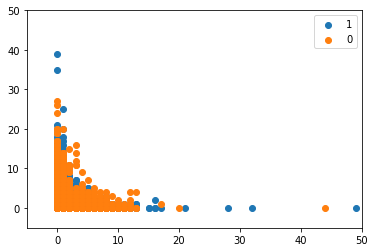

In [102]:
# Visualising the Distribution of the Class Labels (0, 1) as a Scatter Plot

for sm_label, _ in sm_class_counter.items():
	row_ix = where(sm_smote_output_array_y == sm_label)[0]
	plt.scatter(sm_smote_input_array_X[row_ix, 0], sm_smote_input_array_X[row_ix, 1], label=str(sm_label))

plt.xlim([-5, 50])
plt.ylim([-5, 50])
plt.legend()
plt.show()

In [103]:
# Transform the dataset - Oversampling the Minority Class

sm_smote_oversample = SMOTE()
sm_smote_input_X_oversample, sm_smote_output_y_oversample = sm_smote_oversample.fit_resample(sm_smote_input_array_X, sm_smote_output_array_y)

print("Execution Completed")

Execution Completed


In [104]:
# Summary of the New Re-Sampled Class Distribution after applying SMOTE Technique

sm_class_counter_oversample = Counter(sm_smote_output_y_oversample)
print(sm_class_counter_oversample)

Counter({1: 282863, 0: 282863})


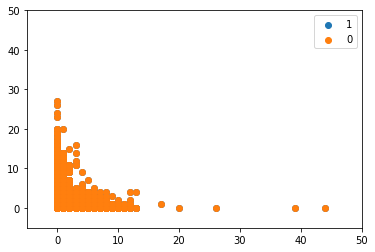

In [105]:
# Re-visualising the Distribution of the Class Labels (0, 1) as a Scatter Plot after applying SMOTE Technique

for sm_label_oversample, _ in sm_class_counter_oversample.items():
	row_ix = where(sm_smote_output_y_oversample == sm_label)[0]
	plt.scatter(sm_smote_input_X_oversample[row_ix, 0], sm_smote_input_X_oversample[row_ix, 1], label=str(sm_label_oversample))

plt.xlim([-5, 50])
plt.ylim([-5, 50])
plt.legend()
plt.show()

In [106]:
# Checking the datatype of the new re-sampled input and output arrays

print("Type of Re-Sampled Input Array: ", type(sm_smote_input_X_oversample))
print("Type of Re-Sampled Output Array: ", type(sm_smote_output_y_oversample))

Type of Re-Sampled Input Array:  <class 'numpy.ndarray'>
Type of Re-Sampled Output Array:  <class 'numpy.ndarray'>


In [107]:
# Checking the shape of the new re-sampled input and output arrays

print("Type of Re-Sampled Input Array: ", sm_smote_input_X_oversample.shape)
print("Type of Re-Sampled Output Array: ", sm_smote_output_y_oversample.shape)

Type of Re-Sampled Input Array:  (565726, 25)
Type of Re-Sampled Output Array:  (565726,)


In [108]:
# Displaying the first 10 data instances of the re-sampled input array

sm_smote_input_X_oversample[:10]

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      9,      0,     21,      0,   5692,    120,    197,
            18,     18,      1,      1,      0,      4,  60000,     10,
             2],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      4,     33,     62,      0,  19190,    158,    196,
             6,      6,      2,      0,      0,      1,  60000,     11,
             0],
       [     0,      0,      0,      0,      0,      1,      0,      0,
             0,      2,    100,     41,      0,      0,     89,    227,
             6,      6,      0,      1,      0,      2,  65000,     27,
             0],
       [     3,      0,      0,      3,      0,      0,      0,      0,
             0,      5,     50,     74,     47,   2457,     26,    308,
             8,      8,      0,      1,      0,      4,  57000,     12,
             2],
       [     0,      1,      0,      0,      0,      0,      0,     

In [109]:
# Displaying the first 10 data instances of the re-sampled output array

sm_smote_output_y_oversample[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

## Converting Re-Sampled Input Array to Dataframe

In [110]:
# Converting the re-sampled input array back to pandas dataframe

source_model_raw_train_inputs_resampled = pd.DataFrame(sm_smote_input_X_oversample, columns=sm_finalised_features_list_inputs_modified)

print("Execution Completed")

Execution Completed


In [111]:
# Checking the datatype of the input dataframe created from re-sampled array

type(source_model_raw_train_inputs_resampled)

pandas.core.frame.DataFrame

In [112]:
# Checking the size of the input dataframe created from re-sampled array

source_model_raw_train_inputs_resampled.shape

(565726, 25)

In [114]:
# Displaying the first 5 data instances from the input dataframe created from re-sampled array

source_model_raw_train_inputs_resampled.head()

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int
0,0,0,0,0,0,0,0,0,0,9,0,21,0,5692,120,197,18,18,1,1,0,4,60000,10,2
1,0,0,0,0,0,0,0,0,0,4,33,62,0,19190,158,196,6,6,2,0,0,1,60000,11,0
2,0,0,0,0,0,1,0,0,0,2,100,41,0,0,89,227,6,6,0,1,0,2,65000,27,0
3,3,0,0,3,0,0,0,0,0,5,50,74,47,2457,26,308,8,8,0,1,0,4,57000,12,2
4,0,1,0,0,0,0,0,0,0,4,67,80,0,0,39,133,10,10,1,0,0,2,100000,31,5


In [115]:
# Displaying the last 5 data instances from the input dataframe created from re-sampled array

source_model_raw_train_inputs_resampled.tail()

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int
565721,0,0,0,0,0,0,0,0,0,9,100,83,0,0,54,266,12,12,0,0,0,2,45000,15,8
565722,0,1,0,0,0,0,0,0,0,2,8,44,16,3926,246,296,8,7,5,1,0,1,160000,3,8
565723,0,0,0,0,0,1,0,0,0,8,48,46,66,2992,92,177,13,13,0,0,0,0,62000,30,9
565724,0,0,0,0,0,0,0,0,0,8,46,50,0,0,175,246,12,12,2,0,0,0,59000,26,2
565725,0,0,0,0,0,0,0,0,0,6,16,64,56,15789,54,104,8,8,0,1,0,3,160000,16,3


## Converting Re-Sampled Output Array to Dataframe

In [116]:
# Converting the re-sampled output array back to pandas dataframe

source_model_raw_train_output_resampled = pd.DataFrame(sm_smote_output_y_oversample, columns=['score_status'])

print("Execution Completed")

Execution Completed


In [117]:
# Checking the datatype of the output dataframe created from re-sampled array

type(source_model_raw_train_output_resampled)

pandas.core.frame.DataFrame

In [118]:
# Checking the size of the output dataframe created from re-sampled array

source_model_raw_train_output_resampled.shape

(565726, 1)

In [119]:
# Displaying the first 5 data instances from the output dataframe created from re-sampled array

source_model_raw_train_output_resampled.head()

,score_status
0,1
1,1
2,0
3,0
4,0


In [120]:
# Displaying the last 5 data instances from the output dataframe created from re-sampled array

source_model_raw_train_output_resampled.tail()

,score_status
565721,0
565722,0
565723,0
565724,0
565725,0


## Joining the Output Dataframe Column to the Input Dataframe

In [121]:
# Joining the Output Dataframe Target Column "score_status" to the Input Dataframe

score_status = source_model_raw_train_output_resampled['score_status']
source_model_raw_train_inputs_resampled = source_model_raw_train_inputs_resampled.join(score_status)

print("Execution Completed")

Execution Completed


In [123]:
# Displaying the Final Merged Source Model (SM) Dataframe after Re-Sampled Data using SMOTE Technique

source_model_raw_train_inputs_resampled.head()

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int,score_status
0,0,0,0,0,0,0,0,0,0,9,0,21,0,5692,120,197,18,18,1,1,0,4,60000,10,2,1
1,0,0,0,0,0,0,0,0,0,4,33,62,0,19190,158,196,6,6,2,0,0,1,60000,11,0,1
2,0,0,0,0,0,1,0,0,0,2,100,41,0,0,89,227,6,6,0,1,0,2,65000,27,0,0
3,3,0,0,3,0,0,0,0,0,5,50,74,47,2457,26,308,8,8,0,1,0,4,57000,12,2,0
4,0,1,0,0,0,0,0,0,0,4,67,80,0,0,39,133,10,10,1,0,0,2,100000,31,5,0


In [124]:
# Checking the Size of the Final Merged Source Model (SM) Dataframe after Re-Sampled Data using SMOTE Technique

source_model_raw_train_inputs_resampled.shape

(565726, 26)

In [125]:
# Creating a Copy of the Source Model Raw Train Re-Sampled Data

source_model_train_resampled = source_model_raw_train_inputs_resampled.copy()

print("Execution Completed")

Execution Completed


In [126]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [127]:
# Checking the size of the dataset

source_model_train_resampled.shape

(565726, 26)

In [129]:
# Displying the first 5 data instances before sort

source_model_train_resampled.head()

,pub_rec,delinq_2yrs,num_tl_120dpd_2m,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_accts_ever_120_pd,acc_now_delinq,num_tl_30dpd,total_rec_late_fee,num_rev_tl_bal_gt_0,percent_bc_gt_75,revol_util,il_util,max_bal_bc,mo_sin_old_rev_tl_op,months_since_earliest_cr_line,open_acc,num_sats,mort_acc,inq_last_6mths,open_il_12m,num_tl_op_past_12m,annual_inc,dti,emp_length_int,score_status
0,0,0,0,0,0,0,0,0,0,9,0,21,0,5692,120,197,18,18,1,1,0,4,60000,10,2,1
1,0,0,0,0,0,0,0,0,0,4,33,62,0,19190,158,196,6,6,2,0,0,1,60000,11,0,1
2,0,0,0,0,0,1,0,0,0,2,100,41,0,0,89,227,6,6,0,1,0,2,65000,27,0,0
3,3,0,0,3,0,0,0,0,0,5,50,74,47,2457,26,308,8,8,0,1,0,4,57000,12,2,0
4,0,1,0,0,0,0,0,0,0,4,67,80,0,0,39,133,10,10,1,0,0,2,100000,31,5,0


## Saving the Source Model (SM) Re-Sampled Training Data into a csv file

In [130]:
# Exporting the Source Model (SM) Re-Sampled Training Data into a csv file

source_model_train_resampled.to_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhyauk6/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_pp_data/source_model_train_resampled.csv")

print("Data Export Completed")

Data Export Completed
